In [1]:
import h5py
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Read all data from the nodes and edges file saved by build_network.py

In [2]:
def SaveDataToDF(f):
    myData = []
    myDataNames = []
    def saveDat(item):
        if 'Data' in str(f[item].id):
            data2use = f[item][()]
            if data2use.ndim == 2:#some groups have multiple columns and this messes up the translation to a df at the end of this function
                [a,b] = data2use.shape
                for col in np.arange(0,b):
                    myData.append(data2use[:,col])
                    dataName = (f[item].name).split('/')[-1] + str(col)
                    myDataNames.append(dataName)
            else:
                myData.append(f[item][()])
                dataName = (f[item].name).split('/')[-1]
                myDataNames.append(dataName)
        
    f.visit(saveDat)
    allData = pd.DataFrame(myData).T
    allData.columns = myDataNames
    f.close()
    return allData

In [3]:
pathname = 'network'

In [71]:
f = h5py.File(os.path.join(pathname,'biophysical_biophysical_edges.h5'), 'r')
edgesDF = SaveDataToDF(f) 
f = h5py.File(os.path.join(pathname,'biophysical_nodes.h5'), 'r')
nodesDF = SaveDataToDF(f)

# using bmtools

In [9]:
cmd = 'bmtools plot --config simulation_configLFP.json positions'

In [17]:
cmd = 'bmtools plot --config simulation_configLFP.json  connection total'

In [18]:
cmd = 'bmtools plot --config simulation_configLFP.json  connection --sids pop_name --tids pop_name total'

In [22]:
node_types = pd.read_csv(os.path.join('network','biophysical_node_types.csv'))

In [21]:
nodeNames = ['AAC_SO','OLM_SO','PV_SO','Pyr_SP','AAC_SP','PV_SP','AAC_SR','PV_SR']

In [31]:
node_types.iloc[1]

node_type_id model_template pop_name model_type rotation_angle_zaxis morphology mem_potential    101 hoc:olmcell OLM biophysical 1.570796326794...
Name: 1, dtype: object

# change the node ids to node names

In [93]:
cellLocations = pd.read_csv('cell_locations.csv')
idNames = np.unique(nodesDF['node_type_id'])
cellNames = np.unique(cellLocations['Cell type'])
array = cellLocations['Cell type']
idxs = np.unique(cellLocations['Cell type'],return_index=True)[1]
cellNames = [array[index] for index in sorted(idxs)]#use the names in the order in which the id's appear
nodesDF = nodesDF.replace({'node_type_id':idNames},{'node_type_id':cellNames})

In [ ]:
import plotly.express as px
fig = px.scatter_3d(nodesDF,x ='positions0', y='positions1', z='positions2',
                    color = 'node_type_id',
                    opacity = 0.7)
fig.update_traces(marker_size = 6)
fig.write_html('networkNodes2.html',auto_open=True)

# plot nodes edges - wip

In [ ]:
#find the node source id and get its position, then find the destination node id, and get its position
#there will be a -1 x 6 array of the source to target connections

In [315]:
xlocofEdgeSource = nodesDF['positions0'][np.array(edgesDF['source_node_id'])]
YlocofEdgeSource = nodesDF['positions1'][np.array(edgesDF['source_node_id'])]
ZlocofEdgeSource = nodesDF['positions2'][np.array(edgesDF['source_node_id'])]
xlocofEdgedest = nodesDF['positions0'][np.array(edgesDF['target_node_id'])]
YlocofEdgedest = nodesDF['positions1'][np.array(edgesDF['target_node_id'])]
ZlocofEdgedest = nodesDF['positions2'][np.array(edgesDF['target_node_id'])]
locsList = [xlocofEdgeSource,YlocofEdgeSource,ZlocofEdgeSource,xlocofEdgedest,YlocofEdgedest,ZlocofEdgedest]
locsList = [np.array(item).reshape(1,-1) for item in locsList]
df = pd.DataFrame(np.concatenate(locsList)).T
fig = px.line_3d(df, x=0, y=1,z=2)
fig.write_html('testfig.html',auto_open=True)


In [316]:
source,dest = np.array(edgesDF['source_node_id']),np.array(edgesDF['target_node_id'])
pairs = np.vstack((source,dest)).T
pairs = pairs.astype(int)
X,Y,Z = np.array(nodesDF['positions0']),np.array(nodesDF['positions1']),np.array(nodesDF['positions2'])

In [317]:
import plotly.graph_objects as go
x_lines = []
y_lines = []
z_lines = []
nameList = list(set(nodesDF['node_type_id']))

#create the coordinate list for the lines
for p in pairs:
    for i in range(2):
        x_lines.append(X[p[i]])
        y_lines.append(Y[p[i]])
        z_lines.append(Z[p[i]])
    x_lines.append(None)
    y_lines.append(None)
    z_lines.append(None)

trace2 = go.Scatter3d(
    x=x_lines,
    y=y_lines,
    z=z_lines,
    mode='lines',
    name='lines'
)

Name2Use = nameList[0]
trace1 = go.Scatter3d(
    x = np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions0']),
    y=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions1']),
    z=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions2']),
    mode='markers',
    name = Name2Use
    
)
Name2Use = nameList[1]
trace3 = go.Scatter3d(
    x = np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions0']),
    y=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions1']),
    z=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions2']),
    mode='markers',
    name = Name2Use
    
)
Name2Use = nameList[2]
trace4 = go.Scatter3d(
    x = np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions0']),
    y=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions1']),
    z=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions2']),
    mode='markers',
    name = Name2Use
    
)

Name2Use = nameList[3]
trace5 = go.Scatter3d(
    x = np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions0']),
    y=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions1']),
    z=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions2']),
    mode='markers',
    name = Name2Use
    
)

Name2Use = nameList[4]
trace6 = go.Scatter3d(
    x = np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions0']),
    y=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions1']),
    z=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions2']),
    mode='markers',
    name = Name2Use
    
)

Name2Use = nameList[5]
trace7 = go.Scatter3d(
    x = np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions0']),
    y=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions1']),
    z=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions2']),
    mode='markers',
    name = Name2Use
    
)

Name2Use = nameList[6]
trace8 = go.Scatter3d(
    x = np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions0']),
    y=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions1']),
    z=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions2']),
    mode='markers',
    name = Name2Use
    
)

Name2Use = nameList[7]
trace9 = go.Scatter3d(
    x = np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions0']),
    y=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions1']),
    z=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions2']),
    mode='markers',
    name = Name2Use
    
)



figlines = go.Figure(data=[trace1, trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9])


In [372]:
figlines.write_html('testfig.html',auto_open=True)

### construct adjacency matrix of the directed graph

In [ ]:
# nxn nodeids
#each row is the number of outgoing connections to nodeids in the columns

In [15]:
targetIDs = np.array(edgesDF['target_node_id'])
sourceIDs = np.array(edgesDF['source_node_id'])
source2targetIDs = pd.DataFrame(np.vstack((sourceIDs,targetIDs))).T
source2targetIDs.columns = ['source','target']
df = source2targetIDs
nodeArray = np.array(df)# nice to have a df for viewing and array for computing

In [16]:
#get the counts of source to target

In [17]:
IDS = np.arange(0,len(np.unique(df['source'])))
adj = np.zeros((len(IDS),len(IDS)))#nxn matrix


In [18]:
for i in range(0,len(IDS)):
    idxs = nodeArray[nodeArray[:,0]==i][:,1]#grab the targets for which the source id is i...
    #add something for checking unique, or rate of messages, or something to add as the values instead of just 1 for a connection.
    adj[i][idxs.astype(int)] = 1#... and place a 1 in that location. ideally this is the count of connections to this target, but for now it is only 1 connection in the model

In [23]:
np.save('adjacencyMatrix',adj)

# use the adjacency matrix to calculate summary statistics about the network

In [7]:
import networkx as nx

In [6]:
adj = np.load('adjacencyMatrix.npy')
cellLocations = pd.read_csv('cell_locations.csv')


In [131]:
#get a list of the layer names in order of 
layerList = cellLocations['Cell type']
idxs = np.unique(cellLocations['Cell type'],return_index=True)[1]
layerNames = [array[index] for index in sorted(idxs)]#use the names in the order in which the id's appear


In [68]:
# first get a df of the cell layers and their index boundaries

In [41]:
def getSectionBeginEnd(layerNames,name):
    group = np.where(layerNames == name)[0]
    begin = group[0]
    end = group[len(group)-1]
    return begin,end

In [141]:
starts,ends = [], []

nameSet = list(set(layerNames))
for name in layerNames:
    begin, end = getSectionBeginEnd(layerList,name)
    starts.append(begin)
    ends.append(end)


In [142]:
df1 = pd.DataFrame(starts,index = nameSet, columns = ['start'])
df2 = pd.DataFrame(ends,index = nameSet, columns = ['end'])
layerIdxsDF = pd.concat([df1,df2],axis=1)
layerIdxsDF

,start,end
AAC in SP layer,0,34
Pyr in SP layer,35,198
AAC in SO layer,199,330
PV in SO layer,331,31480
OLM in SO layer,31481,31583
PV in SR layer,31584,31971
PV in SP layer,31972,31980
AAC in SR layer,31981,32013


In [78]:
G = nx.from_numpy_array(adj,create_using=nx.DiGraph)#directed graph of the network, recall rows are senders, columns are recievers

In [237]:
def groupSumStats(G,IDS):
    out_degree_centrality = nx.group_out_degree_centrality(G,IDS)
    in_degree_centrality = nx.group_in_degree_centrality(G,IDS)
    clusterDict = nx.clustering(G, IDS)
    avgClustering = np.mean([clusterDict[key] for key in clusterDict])
    return [in_degree_centrality,out_degree_centrality,avgClustering]

In [209]:
def calcNetStats(G,layerList,layerNames):
    AllStats = []
    for name in layerNames:
        IDS = np.where(layerList == name)[0]
        AllStats.append(groupSumStats(G,IDS))
    return AllStats

In [238]:
netStats = calcNetStats(G,layerList,layerNames)

[0, 13732, 4]


In [242]:
results.to_csv('networkStats.csv')

In [175]:
# make a dataframe with rows are layer names, and columns with the given metric's summary stats

In [241]:

netStatNames = ["inDeg_cent","outDeg_cent","avgClustering"]
results = pd.DataFrame(netStats,columns = netStatNames,index = layerNames)
results

,inDeg_cent,outDeg_cent,avgClustering
AAC in SO layer,0.176178,0.712812,0.002812
OLM in SO layer,0.977991,0.998619,0.001232
PV in SO layer,0.817013,0.969418,0.005264
Pyr in SP layer,1.000000,1.000000,0.057975
AAC in SP layer,0.450158,0.960014,0.002537
PV in SP layer,0.986688,0.994720,0.005061
AAC in SR layer,0.054460,0.290267,0.002830
PV in SR layer,0.353960,0.608955,0.005015


In [240]:
#other metrics to explore:
print(nx.shortest_path(G, source=0, target=4))

[0, 13732, 4]


In [114]:
test.index

RangeIndex(start=0, stop=1, step=1)

In [ ]:
#just get the indices of the layer ranges, and comput the sum stats over that in the adj matrix

In [42]:
np.where(cent==max(cent))

(array([93], dtype=int64),)

In [46]:
layerNames[np.where(cent==max(cent))[0]]

93    OLM in SO layer
Name: node_type_id, dtype: object

In [29]:
adjacencyDF = pd.DataFrame(adj,columns = IDS,index=IDS)

32014

import h5py
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd# model output results

In [125]:
f = h5py.File(os.path.join('output','spikes.h5'), 'r')
spikesDF = SaveDataToDF(f) 

In [126]:
f = h5py.File(os.path.join('output','v_report.h5'), 'r')
traces = f['report/biophysical/data'][()]
f.close()

In [134]:
spikingCellIDs

array([   1, 1519, 2918])

In [141]:
spikesDF

,node_ids,timestamps
0,1.0,115.3
1,1519.0,122.3
2,1519.0,160.6
3,2918.0,122.5
4,2918.0,160.8


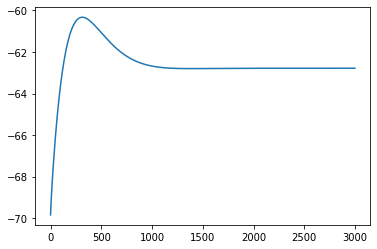

In [138]:
plt.plot(traces[:,1519])

In [135]:
spikesDF['node_ids'][spikesDF['node_ids'] == 1].keys()[0]

0

In [144]:
spikingCellIDs = np.unique(np.array(spikesDF['node_ids'],dtype=int))
spikingCellIDs

array([   1, 1519, 2918])

[   1 1519 2918]


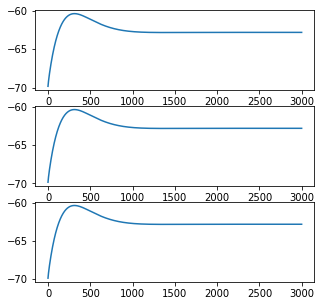

In [128]:
spikingCellIDs = np.unique(np.array(spikesDF['node_ids'],dtype=int))
if len(spikingCellIDs) <=1:
    print('only 1 spiking cell')
    plt.plot(traces)
else:
    
    fig,ax = plt.subplots(len(spikingCellIDs),figsize=(5,5))
    i = 0
    for cell in spikingCellIDs:
        ax[i].plot(traces[:,cell])
        i+=1
    print(spikingCellIDs)


# ECP plotting

In [280]:
f = h5py.File('output/ecp.h5', 'r')
data = f['ecp/data'][()]
time = f['ecp/time'][()]
f.close()

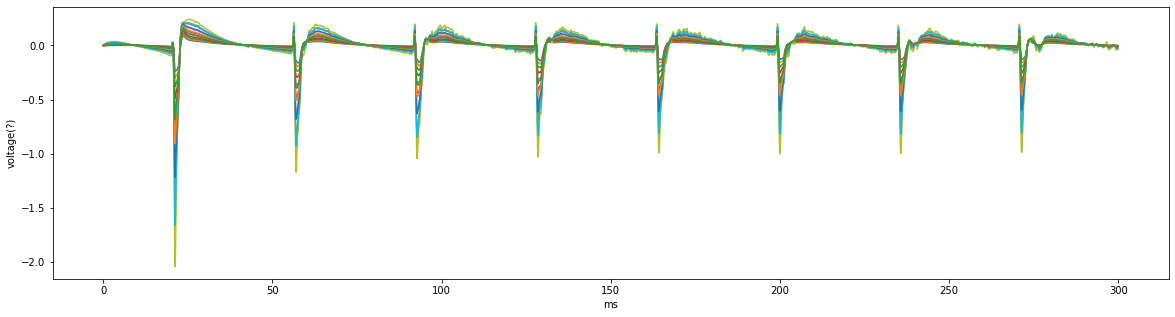

In [281]:
start,end = 0, 3000
plt.figure(figsize=(20,5))
plt.plot(np.arange(time[0],time[1],time[2])[start:end],data[start:end])
plt.xlabel('ms')
plt.ylabel('voltage(?)')
#plt.savefig('ecp.png',dpi=400,background='w')
plt.show()

In [282]:
from scipy import signal

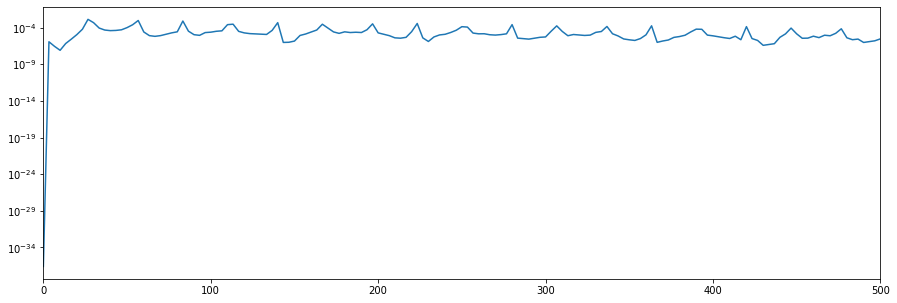

In [283]:
fs = 10000 
f, Pxx_den = signal.periodogram(data[:,8], fs)
plt.figure(figsize=(15,5))
plt.semilogy(f, Pxx_den)
plt.xlim([0,500])
#plt.ylim([10e-10,10-4])
plt.show()

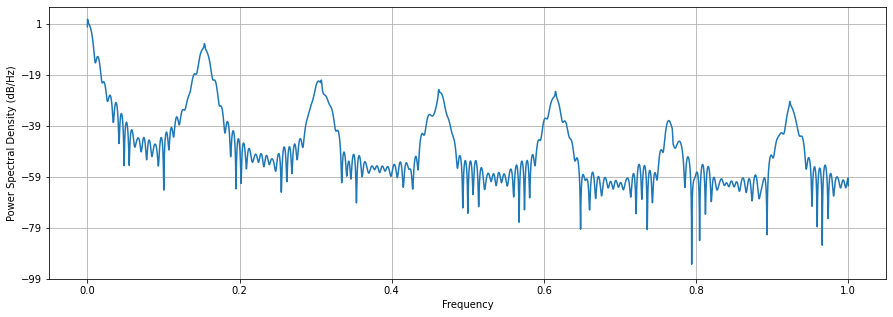

In [284]:
plt.figure(figsize=(15,5))
Pxx,freqs = plt.psd(data,NFFT = fs,noverlap=True)

In [6]:
f = h5py.File(os.path.join('output','spikes.h5'), 'r')
spikesDF = SaveDataToDF(f) 

# plot individual voltage responses

In [348]:
f = h5py.File(os.path.join("output",'v_report.h5'), 'r')
vreports = SaveDataToDF(f)

f = h5py.File(os.path.join('network','biophysical_nodes.h5'), 'r')
nodesDF = SaveDataToDF(f)
f = h5py.File(os.path.join('output','spikes.h5'), 'r')
spikesDF = SaveDataToDF(f) 

f = h5py.File(os.path.join("output",'v_report_axon.h5'), 'r')
axonsDF = SaveDataToDF(f)

spikingCellIDs = np.unique(np.array(spikesDF['node_ids'],dtype=int))
print(spikingCellIDs)


cellLocations = pd.read_csv('cell_locations.csv')
idNames = np.unique(nodesDF['node_type_id'])
cellNames = np.unique(cellLocations['Cell type'])
array = cellLocations['Cell type']
idxs = np.unique(cellLocations['Cell type'],return_index=True)[1]
cellNames = [array[index] for index in sorted(idxs)]#use the names in the order in which the id's appear

nodesDF = nodesDF.replace({'node_type_id':idNames},{'node_type_id':cellNames})

[   0    1    2 ... 3156 3157 3197]


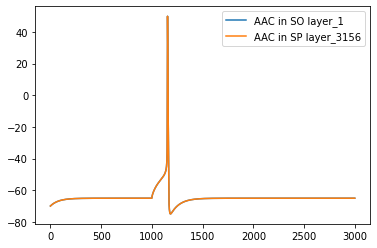

In [273]:
gids = [1,3156]
for gid in gids:
    
    cellNo = vreports['node_ids'][vreports['node_ids'] == gid].keys()[0]
    name = nodesDF['node_type_id'][vreports['node_ids'][cellNo]]
    plt.plot(vreports['data'+str(cellNo)],label = name+'_'+str(gid))
plt.legend()
plt.show()

In [274]:
f = h5py.File(os.path.join("output",'v_report_axon.h5'), 'r')
vreportsA = SaveDataToDF(f)

In [275]:
f = h5py.File(os.path.join('network','biophysical_biophysical_edges.h5'), 'r')
sourceID = f['edges/biophysical_to_biophysical/source_node_id'][()]
targetID = f['edges/biophysical_to_biophysical/target_node_id'][()]
f.close()

In [276]:
targetID[sourceID == 1]

array([  43,   53,   82,  103,  110,  118,  158,  192,  323,  333,  393,
        412,  423,  465,  493,  498,  543,  550,  560,  564,  589,  609,
        707,  739,  775,  776,  787,  834,  841,  878,  886,  898,  915,
       1011, 1044, 1080, 1138, 1172, 1190, 1197, 1215, 1220, 1251, 1277,
       1293, 1313, 1325, 1331, 1332, 1360, 1387, 1401, 1458, 1484, 1486,
       1487, 1505, 1519, 1537, 1607, 1620, 1650, 1697, 1761, 1775, 1784,
       1845, 1857, 1902, 1959, 1976, 1998, 2003, 2004, 2014, 2015, 2047,
       2120, 2131, 2133, 2176, 2225, 2249, 2286, 2314, 2358, 2362, 2371,
       2389, 2426, 2447, 2467, 2494, 2522, 2532, 2540, 2555, 2571, 2580,
       2595, 2657, 2669, 2675, 2702, 2720, 2759, 2771, 2806, 2870, 2890,
       2901, 2918, 2937, 2974, 2995, 3073, 3077, 3128], dtype=uint64)

In [277]:
sourceID[targetID == 53]

array([   1, 3156,   31, 3167, 3187,    9,   14], dtype=uint64)

In [278]:
gids = sourceID[targetID == 53]
for gid in gids:
    cellNo = vreports['node_ids'][vreports['node_ids'] == gid].keys()[0]
    print('{0} : {1}'.format(nodesDF['node_type_id'][vreports['node_ids'][cellNo]], gid))

AAC in SO layer : 1
AAC in SP layer : 3156
PV in SO layer : 31
PV in SP layer : 3167
PV in SP layer : 3187
OLM in SO layer : 9
OLM in SO layer : 14


In [266]:
print(f['report/biophysical/mapping/element_ids'][()].shape)
f['report/biophysical/mapping/element_ids'][()]

ValueError: Invalid location identifier (invalid location identifier)

In [267]:
f.close()

In [349]:
f = h5py.File(os.path.join("output",'v_report_axon.h5'), 'r')
res = f['report/biophysical/data'][()]
f.close()
allStuff = []
for i in range(0,77,10):
    allStuff.append(res[:,i])

In [350]:
allStuff = np.concatenate(allStuff)

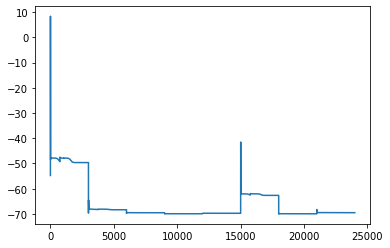

In [351]:
plt.plot(allStuff)
plt.show()

Pyr in SP layer
2317


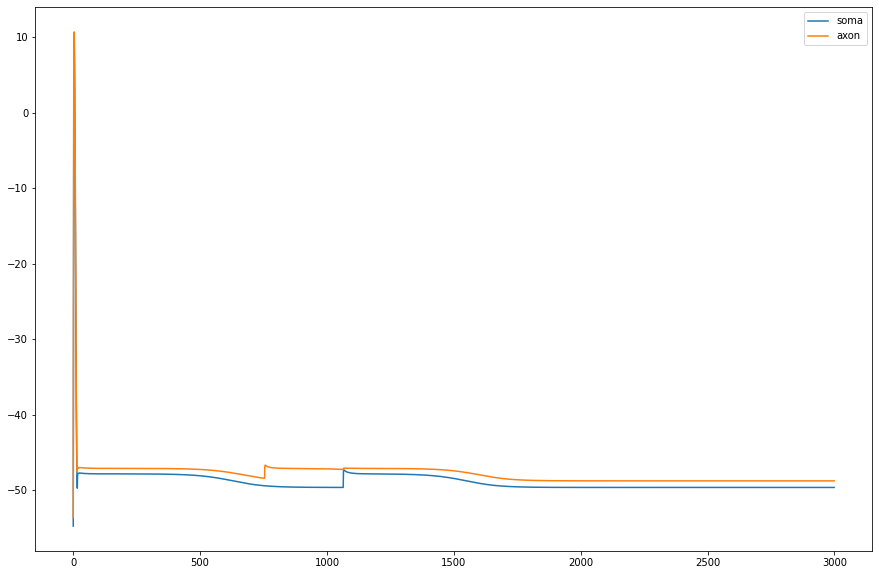

In [352]:
gid = 43
plt.figure(figsize=(15,10))
cellNo = vreports['node_ids'][vreports['node_ids'] == gid].keys()[0]
plt.plot(vreports['data'+str(cellNo)],label='soma')
plt.plot(axonsDF['data76'],label='axon')
plt.legend()
#plt.xlim([1000,1600])
print(nodesDF['node_type_id'][vreports['node_ids'][cellNo]])
print(cellNo)

### look at connections

In [73]:
f = h5py.File(os.path.join('updated_conns','biophysical_biophysical_edges.h5'), 'r')
synsDF = SaveDataToDF(f) 

In [74]:
synsDF[(synsDF['target_node_id'] == gid) & (synsDF['source_node_id'] == 3156)].head()

,sec_id,sec_x,syn_weight,syn_weight,edge_group_id,edge_group_index,edge_type_id,node_id_to_range0,node_id_to_range1,range_to_edge_id0,range_to_edge_id1,node_id_to_range0,node_id_to_range1,range_to_edge_id0,range_to_edge_id1,source_node_id,target_node_id
14615,0.0,0.5,100000.210938,NaN,0.0,1.0,100.0,NaN,NaN,11591.0,11592.0,NaN,NaN,NaN,NaN,3156.0,53.0


In [75]:
synsDF

,sec_id,sec_x,syn_weight,syn_weight,edge_group_id,edge_group_index,edge_type_id,node_id_to_range0,node_id_to_range1,range_to_edge_id0,range_to_edge_id1,node_id_to_range0,node_id_to_range1,range_to_edge_id0,range_to_edge_id1,source_node_id,target_node_id
0,6.0,0.5,5.724198,NaN,0.0,0.0,101.0,0.0,131.0,55.0,56.0,0.0,1.0,0.0,21.0,214.0,0.0
1,6.0,0.5,3.907298,NaN,0.0,1.0,101.0,131.0,249.0,308.0,309.0,1.0,2.0,225.0,244.0,422.0,0.0
2,6.0,0.5,8.043573,NaN,0.0,2.0,101.0,249.0,369.0,469.0,470.0,2.0,3.0,451.0,469.0,426.0,0.0
3,6.0,0.5,5.468943,NaN,0.0,3.0,101.0,369.0,493.0,514.0,515.0,3.0,4.0,690.0,705.0,483.0,0.0
4,6.0,0.5,5.886352,NaN,0.0,4.0,101.0,493.0,622.0,518.0,519.0,4.0,5.0,899.0,1096.0,798.0,0.0
5,6.0,0.5,4.806699,NaN,0.0,5.0,101.0,622.0,824.0,590.0,591.0,5.0,6.0,1333.0,1648.0,854.0,0.0
6,6.0,0.5,3.563945,NaN,0.0,6.0,101.0,824.0,953.0,784.0,785.0,6.0,7.0,1903.0,2116.0,902.0,0.0
7,6.0,0.5,5.294499,NaN,0.0,7.0,101.0,953.0,1033.0,1123.0,1124.0,7.0,8.0,2374.0,2498.0,1280.0,0.0
8,6.0,0.5,5.173375,NaN,0.0,8.0,101.0,1033.0,1206.0,1209.0,1210.0,8.0,9.0,2721.0,3000.0,1384.0,0.0
9,6.0,0.5,5.914505,NaN,0.0,9.0,101.0,1206.0,1343.0,1241.0,1242.0,9.0,10.0,3200.0,3434.0,1422.0,0.0


In [35]:
synsDF[synsDF['source_node_id'] == 1].shape

(1138, 17)

In [158]:
f = h5py.File(os.path.join(pathname,'biophysical_biophysical_edges.h5'), 'r')
edgesDF = SaveDataToDF(f) 

In [170]:
gid = 2918
cellNo = vreports['node_ids'][vreports['node_ids'] == gid].keys()[0]
edgesDF[edgesDF['source_node_id'] == cellNo]

,nsyns,edge_group_id,edge_group_index,edge_type_id,node_id_to_range0,node_id_to_range1,range_to_edge_id0,range_to_edge_id1,node_id_to_range0,node_id_to_range1,range_to_edge_id0,range_to_edge_id1,source_node_id,target_node_id
214,1.0,0.0,214.0,110.0,4395.0,4396.0,10903.0,10904.0,204.0,205.0,4666.0,4674.0,2079.0,4.0


In [169]:
gid = 1519
cellNo = vreports['node_ids'][vreports['node_ids'] == gid].keys()[0]
edgesDF[edgesDF['source_node_id'] == cellNo]

,nsyns,edge_group_id,edge_group_index,edge_type_id,node_id_to_range0,node_id_to_range1,range_to_edge_id0,range_to_edge_id1,node_id_to_range0,node_id_to_range1,range_to_edge_id0,range_to_edge_id1,source_node_id,target_node_id
2119,1.0,0.0,2119.0,110.0,8142.0,8145.0,9712.0,9713.0,2012.0,2013.0,10870.0,10876.0,1073.0,13.0
13701,1.0,0.0,13701.0,101.0,NaN,NaN,13459.0,13460.0,NaN,NaN,NaN,NaN,1073.0,3150.0
15560,1.0,0.0,15560.0,103.0,NaN,NaN,5811.0,5812.0,NaN,NaN,NaN,NaN,1073.0,3192.0


In [168]:
edgesDF[edgesDF['source_node_id'] == 4]

,nsyns,edge_group_id,edge_group_index,edge_type_id,node_id_to_range0,node_id_to_range1,range_to_edge_id0,range_to_edge_id1,node_id_to_range0,node_id_to_range1,range_to_edge_id0,range_to_edge_id1,source_node_id,target_node_id
1431,1.0,0.0,1431.0,109.0,6820.0,6823.0,7670.0,7671.0,1356.0,1357.0,8598.0,8603.0,4.0,10.0
3734,1.0,0.0,3734.0,108.0,NaN,NaN,9070.0,9071.0,NaN,NaN,NaN,NaN,4.0,24.0
4128,1.0,0.0,4128.0,108.0,NaN,NaN,1226.0,1227.0,NaN,NaN,NaN,NaN,4.0,32.0
4210,1.0,0.0,4210.0,106.0,NaN,NaN,3087.0,3088.0,NaN,NaN,NaN,NaN,4.0,63.0
4235,1.0,0.0,4235.0,106.0,NaN,NaN,83.0,84.0,NaN,NaN,NaN,NaN,4.0,75.0
4260,1.0,0.0,4260.0,106.0,NaN,NaN,830.0,831.0,NaN,NaN,NaN,NaN,4.0,83.0
4307,1.0,0.0,4307.0,106.0,NaN,NaN,831.0,832.0,NaN,NaN,NaN,NaN,4.0,98.0
4487,1.0,0.0,4487.0,106.0,NaN,NaN,14225.0,14226.0,NaN,NaN,NaN,NaN,4.0,160.0
4636,1.0,0.0,4636.0,106.0,NaN,NaN,1891.0,1892.0,NaN,NaN,NaN,NaN,4.0,214.0
4660,1.0,0.0,4660.0,106.0,NaN,NaN,3865.0,3866.0,NaN,NaN,NaN,NaN,4.0,221.0


In [161]:
edgesDF.iloc[1]

nsyns                   1.0
edge_group_id           0.0
edge_group_index        1.0
edge_type_id          101.0
node_id_to_range0     132.0
node_id_to_range1     250.0
range_to_edge_id0    4321.0
range_to_edge_id1    4322.0
node_id_to_range0       1.0
node_id_to_range1       2.0
range_to_edge_id0      24.0
range_to_edge_id1      39.0
source_node_id        656.0
target_node_id          0.0
Name: 1, dtype: float64

In [162]:
edgesDF.iloc[1519]

nsyns                    1.0
edge_group_id            0.0
edge_group_index      1519.0
edge_type_id           110.0
node_id_to_range0     6987.0
node_id_to_range1     6989.0
range_to_edge_id0    13154.0
range_to_edge_id1    13155.0
node_id_to_range0     1440.0
node_id_to_range1     1441.0
range_to_edge_id0     8882.0
range_to_edge_id1     8884.0
source_node_id        1130.0
target_node_id          10.0
Name: 1519, dtype: float64

In [159]:
edgesDF

,nsyns,edge_group_id,edge_group_index,edge_type_id,node_id_to_range0,node_id_to_range1,range_to_edge_id0,range_to_edge_id1,node_id_to_range0,node_id_to_range1,range_to_edge_id0,range_to_edge_id1,source_node_id,target_node_id
0,1.0,0.0,0.0,101.0,0.0,132.0,4207.0,4208.0,0.0,1.0,0.0,24.0,241.0,0.0
1,1.0,0.0,1.0,101.0,132.0,250.0,4321.0,4322.0,1.0,2.0,24.0,39.0,656.0,0.0
2,1.0,0.0,2.0,101.0,250.0,370.0,4348.0,4349.0,2.0,3.0,39.0,57.0,958.0,0.0
3,1.0,0.0,3.0,101.0,370.0,493.0,4490.0,4491.0,3.0,4.0,57.0,75.0,1083.0,0.0
4,1.0,0.0,4.0,101.0,493.0,620.0,4594.0,4595.0,4.0,5.0,75.0,280.0,1114.0,0.0
5,1.0,0.0,5.0,101.0,620.0,831.0,4683.0,4684.0,5.0,6.0,280.0,597.0,1289.0,0.0
6,1.0,0.0,6.0,101.0,831.0,971.0,4817.0,4818.0,6.0,7.0,597.0,824.0,1534.0,0.0
7,1.0,0.0,7.0,101.0,971.0,1061.0,4831.0,4832.0,7.0,8.0,824.0,948.0,1643.0,0.0
8,1.0,0.0,8.0,101.0,1061.0,1245.0,5078.0,5079.0,8.0,9.0,948.0,1224.0,1731.0,0.0
9,1.0,0.0,9.0,101.0,1245.0,1375.0,5104.0,5105.0,9.0,10.0,1224.0,1431.0,1999.0,0.0


In [112]:
vreports['node_ids']

0          0.0
1       1920.0
2       2820.0
3        900.0
4       1800.0
5        780.0
6       2700.0
7       1020.0
8       1680.0
9        660.0
10      2580.0
11      1560.0
12      2460.0
13       540.0
14      1440.0
15       420.0
16      2340.0
17      1320.0
18       300.0
19      2220.0
20      1200.0
21      3120.0
22       180.0
23      2100.0
24      1080.0
25      3000.0
26        60.0
27      1980.0
28       960.0
29      2880.0
         ...  
3172      59.0
3173    1979.0
3174     959.0
3175    2879.0
3176    1859.0
3177     839.0
3178    2759.0
3179    1739.0
3180     719.0
3181    2639.0
3182    1619.0
3183     599.0
3184    2519.0
3185     119.0
3186    1499.0
3187     479.0
3188    2399.0
3189    1379.0
3190     359.0
3191    2279.0
3192    1259.0
3193    3179.0
3194     239.0
3195    2159.0
3196    1139.0
3197    3059.0
3198    2039.0
3199    2939.0
3200    1919.0
3201       NaN
Name: node_ids, Length: 3202, dtype: float64

In [55]:
from scipy.signal import butter, lfilter, resample, filtfilt
from scipy.stats import zscore
from scipy.fft import fft, fftfreq, fftshift

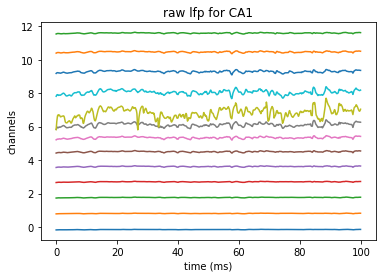

In [40]:
tsim = 300
lfp_file = "output/ecp.h5"
f = h5py.File(lfp_file,'r')
lfp = list(f['ecp']['data'])
lfp_arr = np.asarray(lfp)
lfp = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
for i in range(13):
    lfp[i] = lfp_arr[:,i]
    lfp[i] = [(x*10)+i for x in lfp[i]]
    temp = lfp[i]
    temp = temp[1500:2500]
    plt.plot(np.arange(0,100,0.1),temp)
plt.xlabel('time (ms)')
plt.ylabel('channels')
plt.title("raw lfp for CA1")
plt.show()

In [42]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

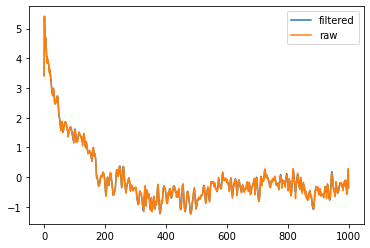

In [47]:
# Filter requirements.
order = 6
fs = 10000       # sample rate, Hz
cutoff = 500  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
data=lfp[0]

y = butter_lowpass_filter(data, cutoff, fs, order)
filtered= resample(y, 1000)
filtered = zscore(filtered)

data = resample(data, 1000)
raw = zscore(data)

plt.plot(np.arange(0,1000, 1), filtered, label='filtered')
plt.plot(np.arange(0,1000, 1), raw, label='raw')

plt.legend()
plt.show()

In [52]:
t = np.arange(len(filtered))

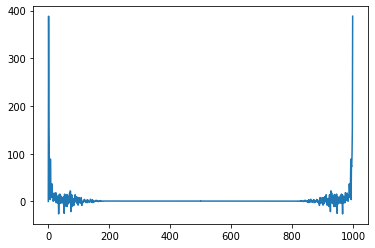

In [53]:
fftRes = scipy.fft.fft(filtered)
plt.plot(t,fftRes.real)

In [113]:
hist, bin_edges = np.histogram(fftRes.real/max(fftRes.real), bins=200)

In [57]:

sp = fftshift(fft(filtered))
freq = fftshift(fftfreq(t.shape[-1]))

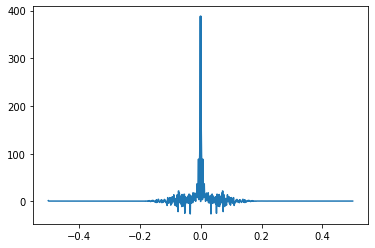

In [68]:
plt.plot(freq,sp.real)

In [201]:
nonzeros = np.array([r for r in fftRes if r != 0])

In [122]:
hist, bin_edges = np.histogram(fftRes.real,bins=200)

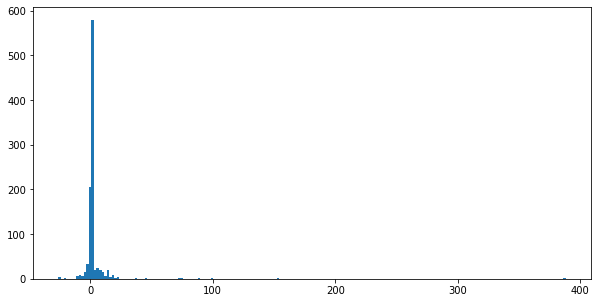

In [203]:
plt.figure(figsize=(10,5))
plt.hist(nonzeros.real,bins=200)
plt.show()

# TESTING

In [336]:
from bmtk.utils.reports.spike_trains import PoissonSpikeGenerator

In [30]:
psg = PoissonSpikeGenerator(population='bgpn')

psg.add(node_ids=1,  # need same number as cells
        firing_rate=50000,    # 1 spike every 5 seconds Hz
        times=(1/1000, 2/1000))  # time is in seconds for some reason


In [21]:
psg.to_sonata('CA1_inputs/bg_pn_spikes.h5')

In [31]:
print('Number of spikes: {}'.format(psg.n_spikes()))
print('Units: {}'.format(psg.units()))

psg.to_dataframe()

Number of spikes: 52
Units: ms


,node_ids,timestamps,population
0,1,1.054939,bgpn
1,1,1.063110,bgpn
2,1,1.106914,bgpn
3,1,1.144070,bgpn
4,1,1.155733,bgpn
5,1,1.193693,bgpn
6,1,1.194066,bgpn
7,1,1.198494,bgpn
8,1,1.210716,bgpn
9,1,1.216851,bgpn


In [30]:
tst = psg.to_dataframe()
tst.iloc[10]

node_ids              1
timestamps    19.309215
population         bgpn
Name: 10, dtype: object

In [32]:
pathname = 'CA1_inputs'
f = h5py.File(os.path.join(pathname,'bg_pn_spikes.h5'), 'r')
f.visit(print)

spikes
spikes/bgpn
spikes/bgpn/node_ids
spikes/bgpn/timestamps


In [37]:
tst = SaveDataToDF(f)

In [44]:
tst.head(20)

,node_ids,timestamps
0,0.0,81.784365
1,0.0,93.590084
2,0.0,139.894619
3,0.0,144.310465
4,0.0,147.109625
5,0.0,159.124039
6,0.0,159.366370
7,0.0,180.782293
8,0.0,186.320028
9,1.0,3.910261


In [3]:
f['spikes/bgpn//node_ids'][()]

array([ 1,  7,  7,  7,  8,  9, 10, 12, 15, 15, 16, 18, 19, 23, 23, 29, 29,
       29, 30, 30, 34, 38, 46, 52, 53, 54, 55, 57, 57, 60, 62, 62, 63],
      dtype=int64)

In [40]:
dir(psg)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_fixed_fr',
 '_build_inhomegeous_fr',
 'adaptor',
 'add',
 'from_csv',
 'from_nwb',
 'from_sonata',
 'load',
 'max_spikes_per_node',
 'time_range']

In [41]:
psg.time_range()

(200.10935571208424, 295.10472372879343)

In [124]:
f.close()

In [20]:
psg.to_csv('CA1_inputs/bg_pn_spikes.txt')

In [3]:
pathname = 'CA1_inputs'

In [24]:
tst = np.loadtxt('CA1_inputs/bg_pn_spikes.txt')

ValueError: could not convert string to float: 'timestamps'

In [6]:
tst = pd.read_csv('CA1_inputs/bg_pn_spikes.txt')
test = np.array(tst)

In [7]:
with h5py.File('bg_pn_spikes.hdf5','w') as f:
    f['bg_pn'] = test


In [5]:
f = h5py.File(os.path.join(pathname,'bg_pn_spikes.hdf5'), 'r')
f.visit(print)

dataset


# run testing

In [428]:
import random
#from bmtk.builder import NetworkBuild
seed = 999
random.seed(seed)
np.random.seed(seed)

#net = NetworkBuilder("biophysical")
# amount of cells
numAAC = 50  # 147
numCCK = 10  # 360
numNGF = 10  # 580
numOLM = 10 # 164
numPV = 10  # 553
numPyr = 10  # 31150

# arrays for cell location csv
cell_name = []
cell_x = []
cell_y = []
cell_z = []
# amount of cells per layer
numAAC_inSO = int(round(numAAC*0.238))
numAAC_inSP = int(round(numAAC*0.7))
numAAC_inSR = int(round(numAAC*0.062))
numCCK_inSO = int(round(numCCK*0.217))
numCCK_inSP = int(round(numCCK*0.261))
numCCK_inSR = int(round(numCCK*0.325))
numCCK_inSLM = int(round(numCCK*0.197))
numNGF_inSR = int(round(numNGF*0.17))
numNGF_inSLM = int(round(numNGF*0.83))
numPV_inSO = int(round(numPV*0.238))
numPV_inSP = int(round(numPV*0.701))
numPV_inSR = int(round(numPV*0.0596))

totalCellNum = numAAC_inSO + numAAC_inSP + numAAC_inSR + numCCK_inSO + numCCK_inSP + numCCK_inSR + numCCK_inSLM + numNGF_inSR + numNGF_inSLM + numPV_inSO + numPV_inSP + numPV_inSR


# total 400x1000x450
# Order from top to bottom is SO,SP,SR,SLM total
# SO layer
xside_length = 400; yside_length = 1000; height = 450; min_dist = 20
x_grid = np.arange(0, xside_length+min_dist, min_dist)
y_grid = np.arange(0, yside_length+min_dist, min_dist)
z_grid = np.arange(320, height+min_dist, min_dist)
xx, yy, zz = np.meshgrid(x_grid, y_grid, z_grid)
pos_list_SO = np.vstack([xx.ravel(), yy.ravel(), zz.ravel()]).T

# SP layer
xside_length = 400; yside_length = 1000; height = 320; min_dist = 8
x_grid = np.arange(0, xside_length+min_dist, min_dist)
y_grid = np.arange(0, yside_length+min_dist, min_dist)
z_grid = np.arange(290, height+min_dist, min_dist)
xx, yy, zz = np.meshgrid(x_grid, y_grid, z_grid)
pos_list_SP = np.vstack([xx.ravel(), yy.ravel(), zz.ravel()]).T

# SR
xside_length = 400; yside_length = 1000; height = 290; min_dist = 20
x_grid = np.arange(0, xside_length+min_dist, min_dist)
y_grid = np.arange(0, yside_length+min_dist, min_dist)
z_grid = np.arange(80, height+min_dist, min_dist)
xx, yy, zz = np.meshgrid(x_grid, y_grid, z_grid)
pos_list_SR = np.vstack([xx.ravel(), yy.ravel(), zz.ravel()]).T

# SLM
xside_length = 400; yside_length = 1000; height = 79; min_dist = 20
x_grid = np.arange(0, xside_length+min_dist, min_dist)
y_grid = np.arange(0, yside_length+min_dist, min_dist)
z_grid = np.arange(0, height+min_dist, min_dist)
xx, yy, zz = np.meshgrid(x_grid, y_grid, z_grid)
pos_list_SLM = np.vstack([xx.ravel(), yy.ravel(), zz.ravel()]).T

# ############ SO LAYER ############ #
# AAC
# Pick location
inds = np.random.choice(np.arange(0, np.size(pos_list_SO, 0)), numAAC_inSO, replace=False)
pos = pos_list_SO[inds, :]



In [429]:
inds

array([4018, 7531, 2256, 1764, 7771, 1294, 7433, 4930, 1049, 8500, 7073,
       3594])

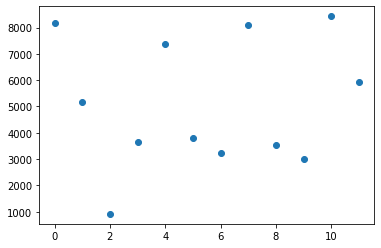

In [461]:
plt.scatter(np.arange(0,len(inds)),inds)

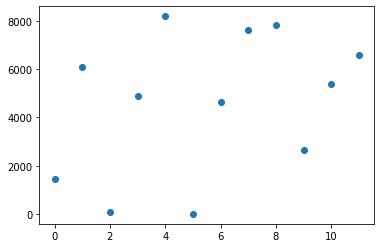

In [460]:
plt.scatter(np.arange(0,len(Idxs)),Idxs)

In [436]:
np.size(pos_list_SO, 0)

8568

In [437]:
pos_list_SO.shape[0]

8568

In [467]:
rng = np.random.default_rng(999)
Idxs = rng.choice(np.arange(0, pos_list_SO.shape[0]), numAAC_inSO, replace=False)

In [455]:
inds = np.random.choice(np.arange(0, np.size(pos_list_SO, 0)), numAAC_inSO, replace=False)
pos = pos_list_SO[inds, :]

In [468]:
Idxs

array([1465, 1491, 1448, 6425, 6964, 1474,  878, 1548, 6109, 1317, 7727,
       6665])

In [457]:
inds

array([8190, 5169,  919, 3644, 7372, 3808, 3216, 8096, 3523, 2994, 8429,
       5927])

In [458]:
np.std(inds)

2366.396385681542

In [459]:
np.std(Idxs)

2805.8984140061493

In [387]:
gParams = np.array([0,0,320,400,1000,450])
def make_layer_grid(xstart,ystart,zstart,x_length,y_length,z_length,min_dist):
    x_grid = np.arange(xstart, x_length+min_dist, min_dist)
    y_grid = np.arange(ystart, y_length+min_dist, min_dist)
    z_grid = np.arange(zstart, z_length+min_dist, min_dist)
    xx, yy, zz = np.meshgrid(x_grid, y_grid, z_grid)
    return np.vstack([xx.ravel(), yy.ravel(), zz.ravel()]).T
    

In [389]:
pos_list_SO_test = make_layer_grid(0,0,320,400,1000,450,20)

In [8]:
import h5py
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [9]:
import os, sys
from bmtk.simulator import bionet
import numpy as np
import synapses
import warnings
from bmtk.simulator.core import simulation_config
from bmtk.simulator.bionet.pyfunction_cache import add_weight_function

In [10]:
def gaussianBL(edge_props, source, target):
    w0 = edge_props["syn_weight"]
    sigma = edge_props["weight_sigma"]
    return np.random.normal(w0, sigma, 1)

def lognormal(edge_props, source, target):
    m = edge_props["syn_weight"]
    s = edge_props["weight_sigma"]
    mean = np.log(m) - 0.5 * np.log((s / m) ** 2 + 1)
    std = np.sqrt(np.log((s / m) ** 2 + 1))
    return np.random.lognormal(mean, std, 1)

In [11]:
synapses.load()

In [12]:
add_weight_function(lognormal)
add_weight_function(gaussianBL)

In [13]:
conf = bionet.Config.from_json('simulation_configLFP.json')

In [14]:
conf.build_env()

2022-06-09 14:34:28,707 [INFO] Created log file


In [19]:
graph = bionet.BioNetwork.from_config(conf)

In [22]:
from bmtk.builder.networks import NetworkBuilder

In [23]:
bgpn = NetworkBuilder('bgpn')
bgpn.add_nodes(
    N=10,
    pop_name='bgpn',
    potential='exc',
    model_type='virtual'
)

In [27]:
print(graph.get_node_set('all').population_names())

['biophysical']


In [9]:
pop = graph._node_populations['biophysical']
for node in pop.get_nodes():
    node._node._node_type_props['morphology'] = node.model_template[1]


In [10]:
cells = graph.get_local_cells()
for cell in cells:
    cells[cell].hobj.insert_mechs(cells[cell].gid)
    pass

In [11]:
sim = bionet.BioSimulator.from_config(conf, network=graph)

2022-06-09 14:23:15,434 [INFO] Building cells.
2022-06-09 14:23:15,722 [INFO] Building recurrent connections
2022-06-09 14:23:15,801 [INFO] Building virtual cell stimulations for bgpn


In [ ]:
cortex.add_nodes(
    cell_name='Scnn1a_473845048',
    potental='exc',
    model_type='biophysical',
    model_template='ctdb:Biophys1.hoc',
    model_processing='aibs_perisomatic',
    dynamics_params='472363762_fit.json',
    morphology='Scnn1a_473845048_m.swc'
)

In [ ]:
thalamus.add_nodes(
    N=100,
    pop_name='tON',
    potential='exc',
    model_type='virtual'
)

In [31]:
graph.add_nodes(tst)

AttributeError: 'DataFrame' object has no attribute 'name'

In [20]:
dir(graph)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_cell',
 '_cells_built',
 '_components',
 '_connections_initialized',
 '_edge_adaptors',
 '_edge_populations',
 '_gap_juncs',
 '_gid_pool',
 '_init_connections',
 '_io',
 '_model_type_map',
 '_morphologies_cache',
 '_morphology_lookup',
 '_node_adaptors',
 '_node_populations',
 '_node_sets',
 '_rank_node_gids',
 '_rank_node_ids',
 '_rank_nodes_by_model',
 '_register_adaptors',
 '_remote_node_cache',
 '_virtual_nodes',
 'add_component',
 'add_edges',
 'add_node_set',
 'add_nodes',
 'add_spike_trains',
 'build',
 'build_nodes',
 'build_recurrent_edges',
 'build_virtual_connections',
 'calc_seg_coords',
 'cell_type_ma

In [20]:
graph._virtual_nodes

{}

In [19]:
dir(graph)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_cell',
 '_cells_built',
 '_components',
 '_connections_initialized',
 '_edge_adaptors',
 '_edge_populations',
 '_gap_juncs',
 '_gid_pool',
 '_init_connections',
 '_io',
 '_model_type_map',
 '_morphologies_cache',
 '_morphology_lookup',
 '_node_adaptors',
 '_node_populations',
 '_node_sets',
 '_rank_node_gids',
 '_rank_node_ids',
 '_rank_nodes_by_model',
 '_register_adaptors',
 '_remote_node_cache',
 '_virtual_nodes',
 'add_component',
 'add_edges',
 'add_node_set',
 'add_nodes',
 'add_spike_trains',
 'build',
 'build_nodes',
 'build_recurrent_edges',
 'build_virtual_connections',
 'calc_seg_coords',
 'cell_type_ma

In [12]:
dir(sim)

['_BioSimulator__elapsed_time',
 '_BioSimulator__tstep_end_block',
 '_BioSimulator__tstep_start_block',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cell_variables',
 '_cell_vars_dir',
 '_celsius',
 '_f_iclamps',
 '_h',
 '_iclamps',
 '_log_file',
 '_nsteps_block',
 '_output_dir',
 '_seclamps',
 '_set_init_conditions',
 '_sim_mods',
 '_spikes',
 '_start_from_state',
 '_v_init',
 'add_mod',
 'attach_current_clamp',
 'attach_file_current_clamp',
 'attach_se_voltage_clamp',
 'biophysical_gids',
 'cell_var_output',
 'cell_variables',
 'celsius',
 'dt',
 'from_config',
 'h',
 'local_gids',
 'n_steps',
 'net',
 'nsteps',
 'nsteps_block',
 'post_fadvance',
 'report_load_b

In [122]:
sim.run()

2022-06-09 13:34:27,797 [INFO] Running simulation for 300.000 ms with the time step 0.100 ms
2022-06-09 13:34:27,798 [INFO] Starting timestep: 0 at t_sim: 0.000 ms
2022-06-09 13:34:27,799 [INFO] Block save every 3000 steps


ValueError: shapes (13,89) and (34,) not aligned: 89 (dim 1) != 34 (dim 0)

NEURON: PyObject method call failed: post_fadvance
 near line 0
 ^
        advance()
      step()
    continuerun(300)
  run(300)


RuntimeError: hoc error

In [14]:
dir(sim)

['_BioSimulator__elapsed_time',
 '_BioSimulator__tstep_end_block',
 '_BioSimulator__tstep_start_block',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cell_variables',
 '_cell_vars_dir',
 '_celsius',
 '_f_iclamps',
 '_h',
 '_iclamps',
 '_log_file',
 '_nsteps_block',
 '_output_dir',
 '_seclamps',
 '_set_init_conditions',
 '_sim_mods',
 '_spikes',
 '_start_from_state',
 '_v_init',
 'add_mod',
 'attach_current_clamp',
 'attach_file_current_clamp',
 'attach_se_voltage_clamp',
 'biophysical_gids',
 'cell_var_output',
 'cell_variables',
 'celsius',
 'dt',
 'from_config',
 'h',
 'local_gids',
 'n_steps',
 'net',
 'nsteps',
 'nsteps_block',
 'post_fadvance',
 'report_load_b